<a href="https://colab.research.google.com/github/MuhammadRifatA/PCVK/blob/main/Week6_PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
import cv2
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

3.Melakukan pnerapan langkah - langkah pada flowchart

In [59]:
original = cv2.imread('/content/drive/MyDrive/Kuliah/PCVK/lena.jpg')
blue = original[:, :, 0]
green = original[:, :, 1]
red = original[:, :, 2]

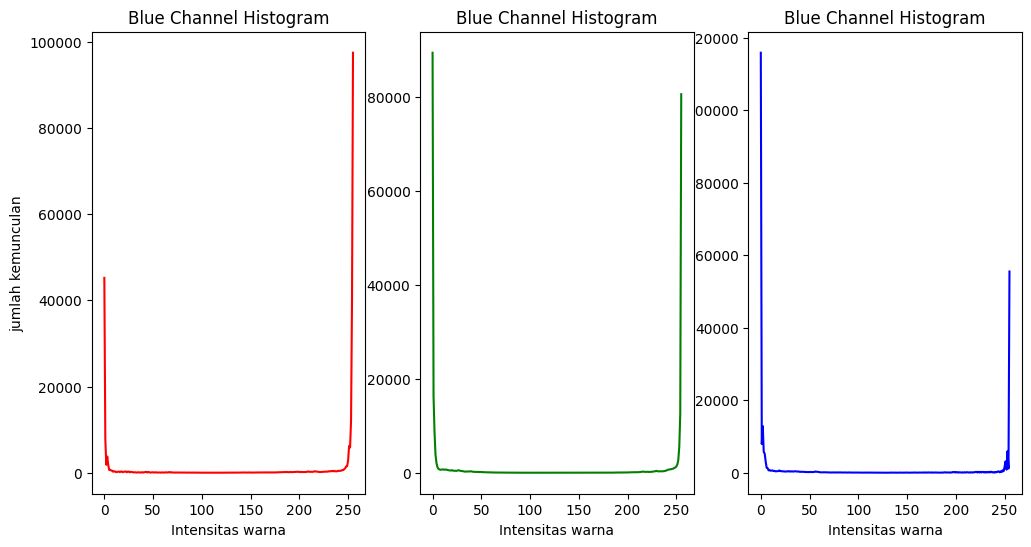

In [60]:
hist_blue = cv2.calcHist([blue], [0], None, [256], [0, 256])
hist_green = cv2.calcHist([green], [0], None, [256], [0, 256])
hist_red = cv2.calcHist([red], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 6))

plt.subplot(133)
plt.plot(hist_blue, color='blue')
plt.title('Blue Channel Histogram')
plt.xlabel('Intensitas warna')
plt.ylabel('jumlah kemunculan')

plt.subplot(132)
plt.plot(hist_green, color='green')
plt.title('Blue Channel Histogram')
plt.xlabel('Intensitas warna')
plt.ylabel('jumlah kemunculan')

plt.subplot(131)
plt.plot(hist_red, color='red')
plt.title('Blue Channel Histogram')
plt.xlabel('Intensitas warna')
plt.ylabel('jumlah kemunculan')

plt.show()

4.Menggunakan Numpy

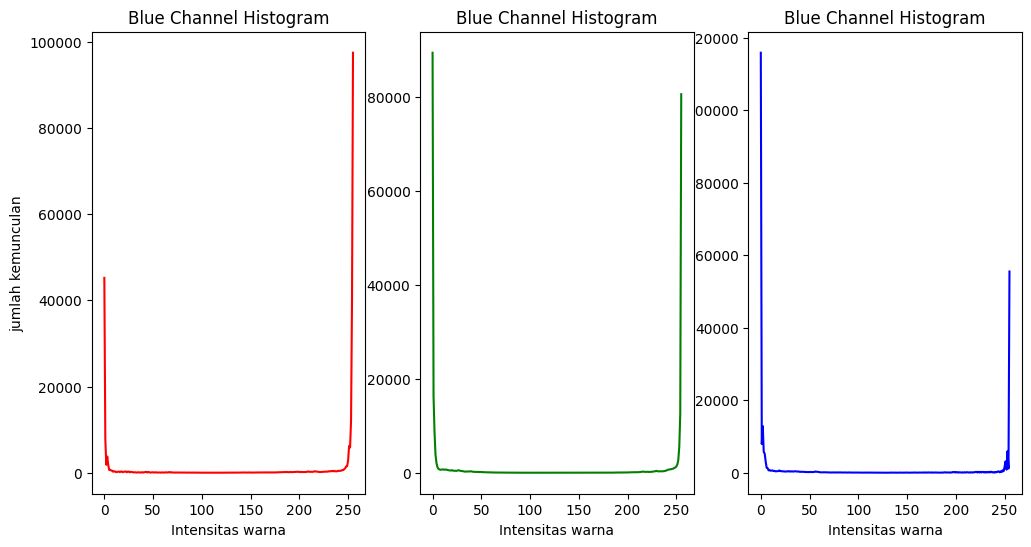

In [61]:
npHistR = np.histogram(red.ravel(), bins=256, range=(0, 256))
npHistG = np.histogram(green.ravel(), bins=256, range=(0, 256))
npHistB = np.histogram(blue.ravel(), bins=256, range=(0, 256))

plt.figure(figsize=(12, 6))

plt.subplot(133)
plt.plot(npHistB[0], color='blue')
plt.title('Blue Channel Histogram')
plt.xlabel('Intensitas warna')
plt.ylabel('jumlah kemunculan')

plt.subplot(132)
plt.plot(npHistG[0], color='green')
plt.title('Blue Channel Histogram')
plt.xlabel('Intensitas warna')
plt.ylabel('jumlah kemunculan')

plt.subplot(131)
plt.plot(npHistR[0], color='red')
plt.title('Blue Channel Histogram')
plt.xlabel('Intensitas warna')
plt.ylabel('jumlah kemunculan')

plt.show()

5.Buatlah histogram citra seperti output histogram equalization dan juga tampilan

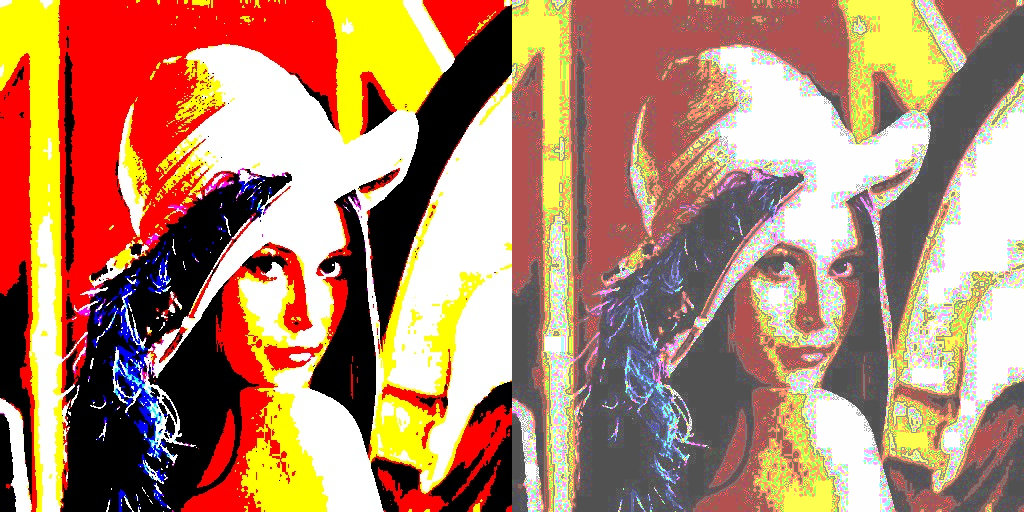

[<Axes: > <Axes: >]


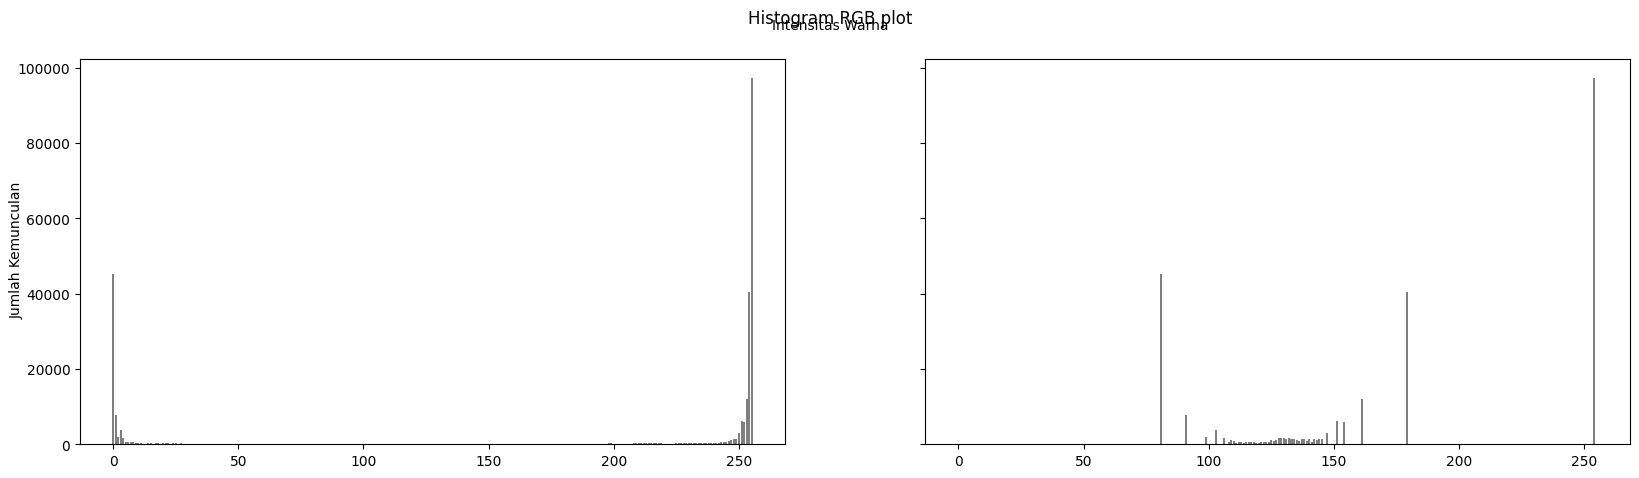

In [62]:
blue = [0]*256
green = [0]*256
red = [0]*256

img1 = cv.imread('/content/drive/MyDrive/Kuliah/PCVK/lena.jpg')
def histog(img1):
  height, width, depth = np.shape(img1)
  ax = np.zeros((3,256))
  for y in range(0,height) :
    for x in range(0,width) :
      ax[0][img1[y][x][0]] += 1
      ax[1][img1[y][x][1]] += 1
      ax[2][img1[y][x][2]] += 1
  return ax

histo_asli = histog(img1)

#convert to Numpy array
img_array = np.asarray(img1)

#Step 1: Normalized cumulative histogram
#flatten image array and calculate histogram via binning
histogram_array = np.bincount(img_array.flatten(), minlength=256)

#normalize
num_pixels = np. sum(histogram_array)
histogram_array = histogram_array/num_pixels

#normalized cumulative histogram
chistogram_array = np.cumsum(histogram_array)

#Step 2: Pixel mapping lookup table
transform_map = np.floor(255 * chistogram_array). astype (np.uint8)

#Step 3: Transformation
# flatten image array into 10 list
img_list = list(img_array.flatten())

# transform pixel values to equalize
eq_img_list = [transform_map[p] for p in img_list]

# reshape and write back into img_array
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
img2 = eq_img_array

equal_histo = histog(img2)

final_frame = cv2.hconcat((img1, img2)) #concatenate image
cv2_imshow(final_frame)

names = np.arange (256)
isgrayimg = np.array_equal(blue, green, red)
#is_color_image = len(img1.shape) == 3 and img1.shape[2] == 3

if not isgrayimg:
    fig, axs = plt.subplots(2, 3, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle('Histogram RGB plot')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
    axs[0, 0].bar(names, histo_asli[2], color='red')
    axs[0, 1].bar(names, histo_asli[1], color='green')
    axs[0, 2].bar(names, histo_asli[0], color='blue')
    axs[1, 0].bar(names, equal_histo[2], color='red')
    axs[1, 1].bar(names, equal_histo[1], color='green')
    axs[1, 2].bar(names, equal_histo[0], color='blue')
else:
    fig, axs = plt.subplots(1, 2, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle('Histogram RGB plot')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.94, 'Intensitas Warna', ha='center')
    print(axs)
    axs[0].bar(names, histo_asli[2], color='gray')
    axs[1].bar(names, equal_histo[2], color='gray')

6.Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan hasilnya. Apakah output muncul sama?

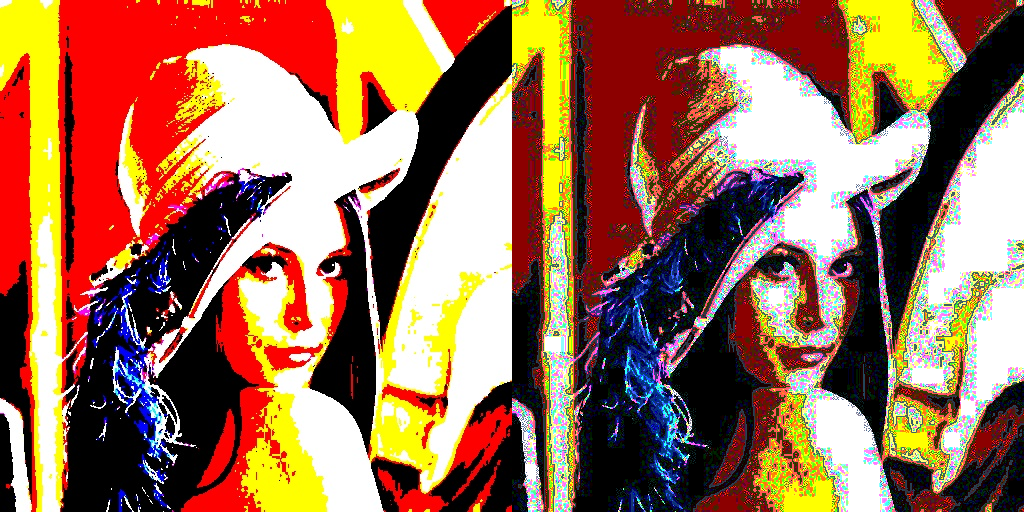

[<Axes: > <Axes: >]


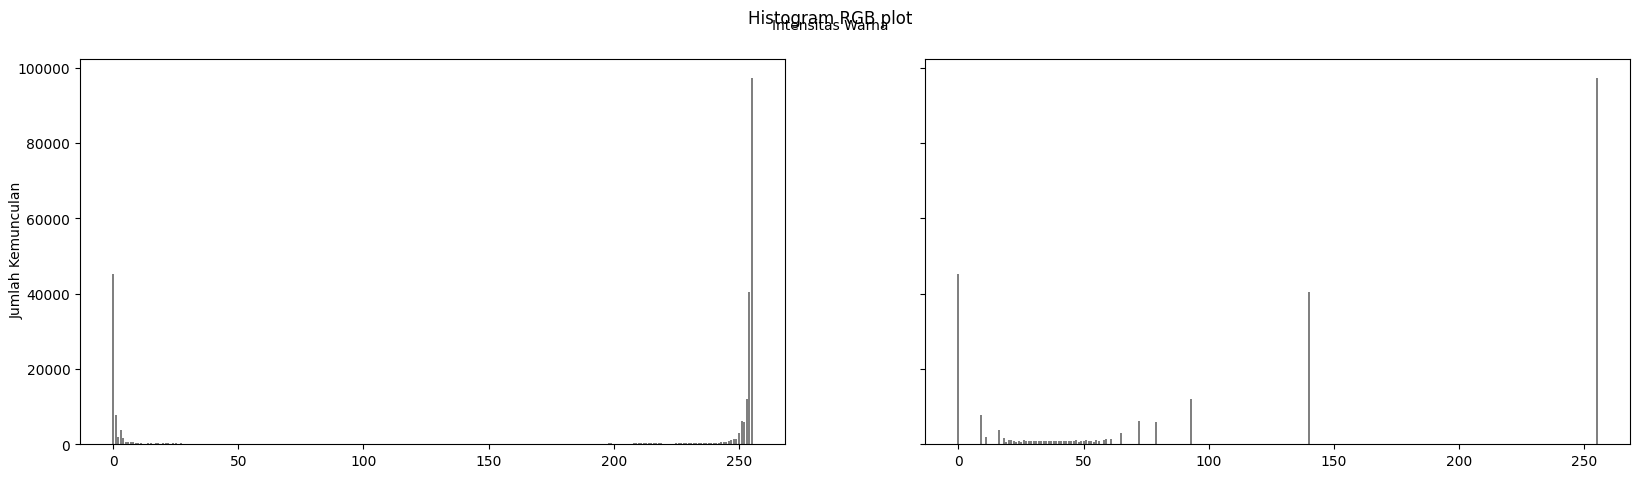

In [63]:
  channels = cv2.split(img1)
  eq_channels = []
  for ch, color in zip(channels, ["r", "g", "b"]):
    eq_channels.append(cv2.equalizeHist(ch))
  eq_image = cv2.merge(eq_channels)
  equal_histo = histog(eq_image)

  final_frame = cv2.hconcat((img1, eq_image))
  cv2_imshow(final_frame)

  names = np.arange(256)
  isgraying = np.array_equal(blue, green, red)
  if (isgraying == False):
    fig, axs = plt.subplots(2, 3, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle('Histogram RGB plot')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
    axs[0, 0].bar(names, histo_asli[2], color='red')
    axs[0, 1].bar(names, histo_asli[1], color='green')
    axs[0, 2].bar(names, histo_asli[0], color='blue')
    axs[1, 0].bar(names, equal_histo[2], color='red')
    axs[1, 1].bar(names, equal_histo[1], color='green')
    axs[1, 2].bar(names, equal_histo[0], color='blue')
  else:
    fig, axs = plt.subplots(1, 2, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle('Histogram RGB plot')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.94, 'Intensitas Warna', ha='center')
    print(axs)
    axs[0].bar(names, histo_asli[2], color='gray')
    axs[1].bar(names, equal_histo[2], color='gray')

7. Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam,

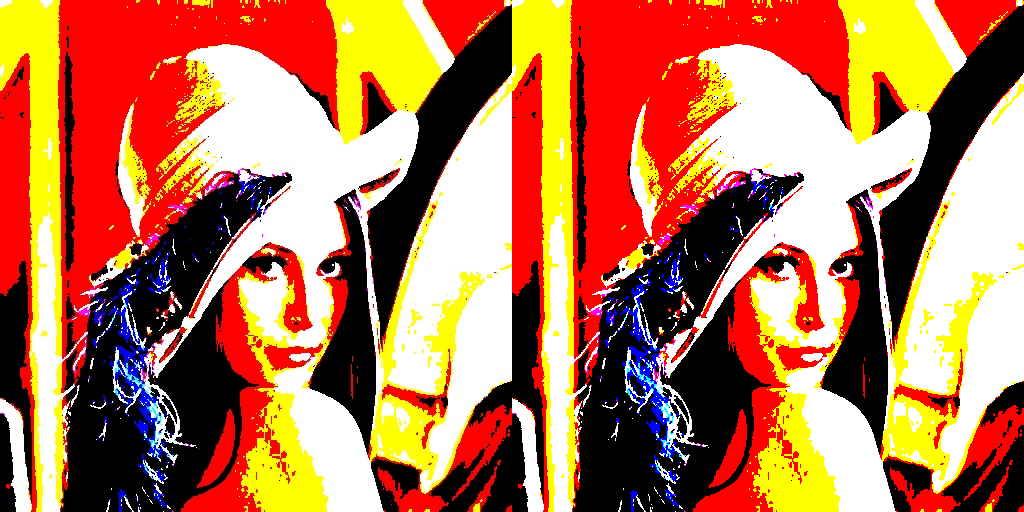

True

In [64]:
def warnaTerdekat (r, g, b):
  pValue = 0
  minDistance = 255*255 + 255*255 + 255*255 + 1
  warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
  for i in range(len(warnaPallette)):
    rDiff = r - warnaPallette[i][0]
    gDiff = g - warnaPallette[i][1]
    bDiff = b - warnaPallette[i][2]
    distance = rDiff*rDiff + gDiff*gDiff + bDiff*bDiff
    if (distance < minDistance):
      minDistance = distance
      pValue = i
  return pValue

warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
img_16 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img_8 = np.zeros(img_16.shape, img_16.dtype)

for y in range(0, img_16.shape[0]):
  for x in range(0, img_16.shape[1]):
    baru = warnaTerdekat(img_16[y, x, 0], img_16[y, x, 1], img_16[y, x, 2])
    img_8[y, x] = warnaPallette[baru]

img_16 = cv2.cvtColor(img_16, cv2.COLOR_BGR2RGB)
img_8 = cv2.cvtColor(img_8, cv2.COLOR_BGR2RGB)
final_frame = cv2.hconcat((img_16, img_8))
cv2_imshow(final_frame)
cv2.imwrite('/content/drive/MyDrive/Kuliah/PCVK/lena.jpg', img_8)

8.Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image

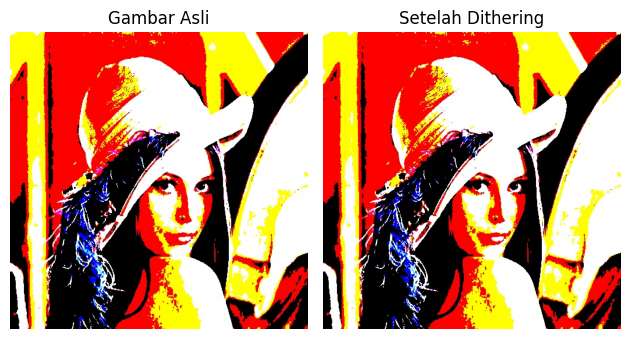

In [65]:
from PIL import Image
import matplotlib.pyplot as plt

# Buka gambar asli
image = Image.open('/content/drive/MyDrive/Kuliah/PCVK/lena.jpg')

# Tampilkan gambar asli
plt.subplot(1, 2, 1)
plt.title('Gambar Asli')
plt.imshow(image)
plt.axis('off')

# Terapkan dithering Floyd-Steinberg
image_dithered = image.convert('P', palette=Image.ADAPTIVE, dither=Image.FLOYDSTEINBERG)

# Tampilkan gambar setelah dithering
plt.subplot(1, 2, 2)
plt.title('Setelah Dithering')
plt.imshow(image_dithered)
plt.axis('off')

# Tampilkan plot
plt.tight_layout()
plt.show()


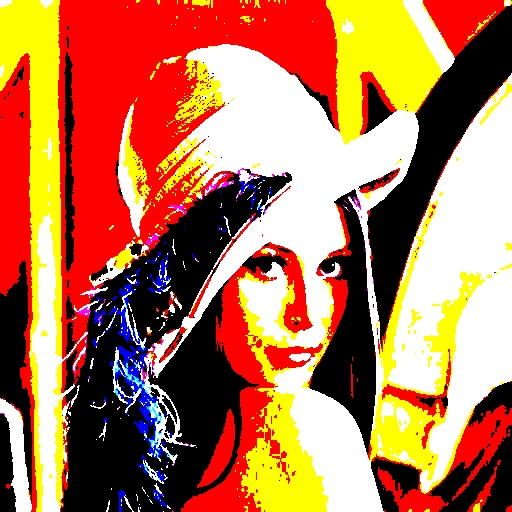

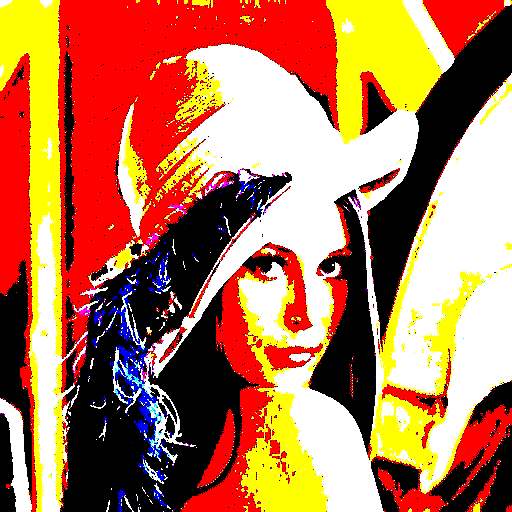

In [68]:
img = cv2.imread('/content/drive/MyDrive/Kuliah/PCVK/lena.jpg')

# Konversi ke tipe float
img_float = np.float64(img)

# Ukuran gambar
height, width, channels = img.shape

# Proses dithering Floyd and Steinberg pada setiap saluran warna
for y in range(height):
    for x in range(width):
        for c in range(channels):  # Loop untuk setiap saluran warna (R, G, B)
            old_value = img_float[y, x, c]
            new_value = round(old_value / 255) * 255
            img_float[y, x, c] = new_value

            error = old_value - new_value

            if x < width - 1:
                img_float[y, x + 1, c] += error * 7 / 16
            if y < height - 1:
                if x > 0:
                    img_float[y + 1, x - 1, c] += error * 3 / 16
                img_float[y + 1, x, c] += error * 5 / 16
                if x < width - 1:
                    img_float[y + 1, x + 1, c] += error * 1 / 16

# Konversi kembali ke tipe uint8
output_img = np.uint8(img_float)

# Menampilkan gambar awal dan hasil dithering
cv2_imshow(img)
cv2_imshow(output_img)

9.Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram

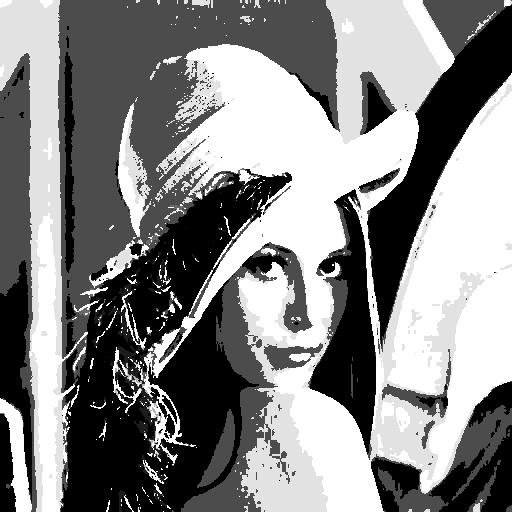

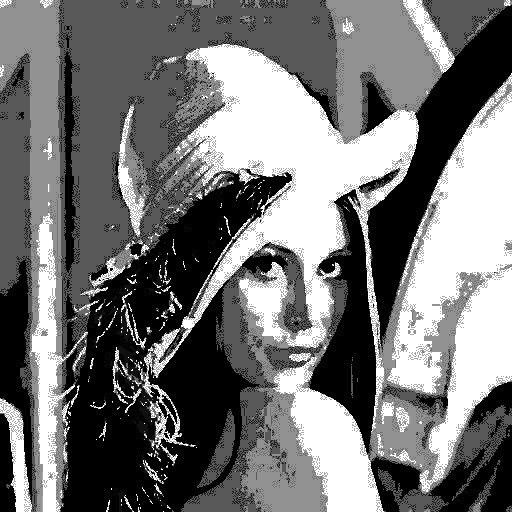

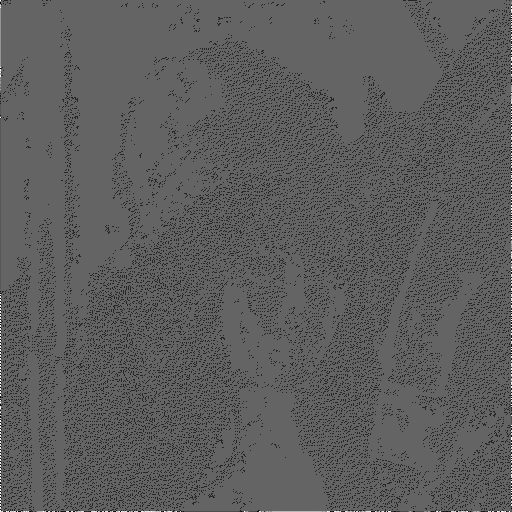

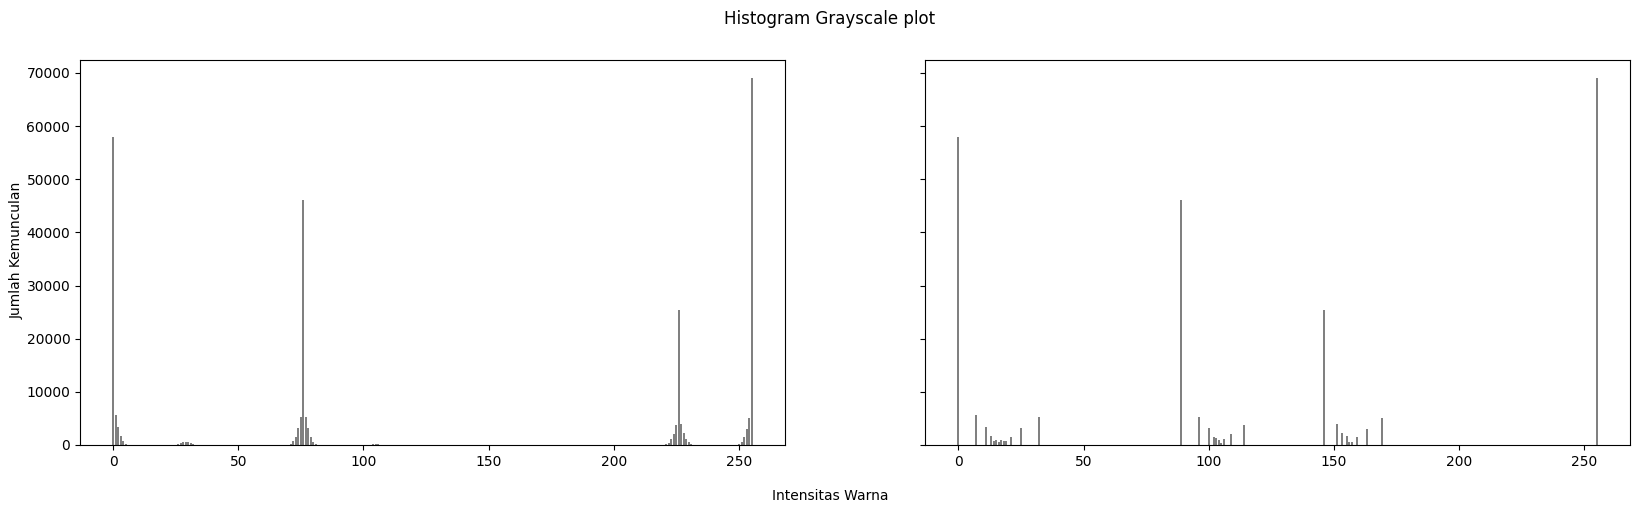

In [69]:
image = cv2.imread("/content/drive/MyDrive/Kuliah/PCVK/lena.jpg", cv2.IMREAD_GRAYSCALE)

# Terapkan histogram equalization
equalized_image = cv2.equalizeHist(image)

# Implementasikan proses dithering Floyd-Steinberg
height, width = equalized_image.shape[0], equalized_image.shape[1]
dithered_image = np.copy(equalized_image)

threshold = 230

for y in range(height - 1):
    for x in range(1, width - 1):
        old_pixel = dithered_image[y, x]
        new_pixel = 550 if old_pixel >= threshold else 100
        dithered_image[y, x] = new_pixel
        quantization_error = old_pixel - new_pixel
        dithered_image[y, x + 1] += quantization_error * 1 / 16
        dithered_image[y + 1, x - 1] += quantization_error * 1 / 16
        dithered_image[y + 1, x] += quantization_error * 3 / 16
        dithered_image[y + 1, x + 1] += quantization_error * 3 / 16

# Hitung histogram untuk citra grayscale asli dan citra hasil equalization
histo_asli = cv2.calcHist([image], [0], None, [256], [0, 256])
histo_equalized = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])

# Menampilkan histogram grayscale
fig, axs = plt.subplots(1, 2, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram Grayscale plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0, 'Intensitas Warna', ha='center')
axs[0].bar(range(256), histo_asli[:,0], color='gray')
axs[1].bar(range(256), histo_equalized[:,0], color='gray')

# Tampilkan citra hasil
cv2_imshow(image)
cv2_imshow(equalized_image)
cv2_imshow(dithered_image)

plt.show()